In [1]:
import os.path
from os.path import isfile, join
import os
from os import listdir
from osgeo import gdal
import errno
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [2]:
# for coloured print statements
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [3]:
path_labels = os.getcwd() + "/1_labeled_data/tif/"
path_satellite = "/home/jovyan/work/satellite_data/"
cutouts_path = os.getcwd() + "/2_cutouts/"

# Code to Compare

/home/jovyan/work/saved_data/Semantic_Segmentation_of_Tree_Stock/1_labeled_data/tif/ ['22-01-05-uploaded.tif', '22-01-05.TIF', 'check-labels-jp2-capizalized-22-01-05.TIF', 'labels-jp2-tif-22.01-05.tif', '22-01-05-test-3-without-tif.tif', 'now.tif', '22-01-30.tif', '22-01-06-with-tif.tif']
Size is 108224 x 107798 x 3
Origin = (29.746877767434313, -26.247113163017453)
Pixel Size = (2.3728143101288307e-06, -2.3728143101288515e-06)
Min=0.000, Max=255.000
Size is 107608 x 107249 x 3
Origin = (27.497387693796565, -26.74753635381557)
Pixel Size = (2.3770193857792506e-06, -2.3770193857792447e-06)
Min=0.000, Max=240.000
0 Success: 2629BD_2018.tif
Size is 108224 x 107798 x 3
Origin = (29.746877767434313, -26.247113163017453)
Pixel Size = (2.3728143101288307e-06, -2.3728143101288515e-06)
Min=0.000, Max=255.000
Cutouts:
Cropped Window: (29.746877767434313, -26.247113163017453, 29.749307529287886, -26.249542924871026)
0 Success: 2629BD_2018-0-0.tif
Size is 1024 x 1024 x 3
Origin = (29.7468777674343

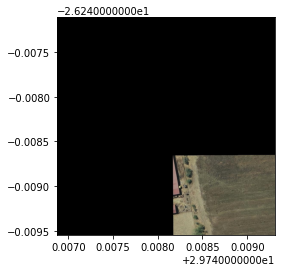

0 Success: 2629BD_2018.tif
Size is 108224 x 107798 x 3
Origin = (29.746877767434313, -26.247113163017453)
Pixel Size = (2.3728143101288307e-06, -2.3728143101288515e-06)
Min=0.000, Max=255.000
Cutouts:
Cropped Window: (29.746877767434313, -26.247113163017453, 29.749307529287886, -26.249542924871026)
0 Success: 2629BD_2018-0-0.tif
Size is 1024 x 1024 x 3
Origin = (29.746877767434313, -26.247113163017453)
Pixel Size = (2.3728143101288307e-06, -2.3728143101288515e-06)
Min=0.000, Max=200.000


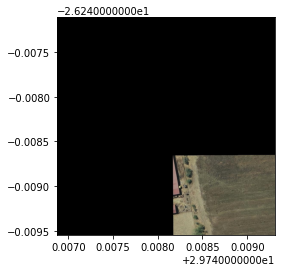

cutout_window: (29.746877767434313, -26.247113163017453, 30.003673223333696, -26.502897800020722)
0 Success: 22-01-30.tif
Size is 4112 x 11377 x 4
Origin = (29.748224553, -26.248672807786964)
Pixel Size = (1.5679484435797747e-05, -1.5679484435797747e-05)
Min=80.000, Max=255.000
Cutouts:
Cropped Window: (29.746877767434313, -26.247113163017453, 29.76293355949657, -26.26316895507971)
0 Success: 22-01-30-0-0.tif
Size is 1024 x 1024 x 4
Origin = (29.74687611733852, -26.247104859343384)
Pixel Size = (1.5679484435797747e-05, -1.5679484435797747e-05)
Min=0.000, Max=255.000


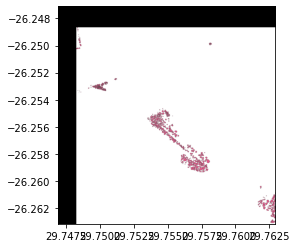

3 files are being deleted.
/home/jovyan/work/saved_data/Semantic_Segmentation_of_Tree_Stock/2_cutouts/2629BD_2018-0-0.tif
/home/jovyan/work/saved_data/Semantic_Segmentation_of_Tree_Stock/2_cutouts/2629BD_2018-0-0.tif.msk
/home/jovyan/work/saved_data/Semantic_Segmentation_of_Tree_Stock/2_cutouts/22-01-30-0-0.tif


NameError: name 'create_cutouts_satellite_label' is not defined

In [4]:
# main for main.ipynb. Then import functions
from ipynb.fs.full.main import inspect_tif #, load_tif, preview_tif, create_cutouts

In [ ]:
files = ["now.tif"] 
window = (29.746877767434313, -26.247113163017453, 29.749307529287886, -26.249542924871026)
load_tif(files, is_label = True, cutout_window = window)

# Cropping Images
## Rasterio
### First Post

In [ ]:
# Code from https://stackoverflow.com/questions/54501232/iteratively-load-image-block-by-block-where-blocks-are-partially-overlapped/54525931#54525931
def overlapping_blocks(src, overlap=0, band=1):
    nols, nrows = src.meta['width'], src.meta['height']
    big_window = windows.Window(col_off=0, row_off=0, width=nols, height=nrows)
    for ji, window in src.block_windows(band):

        if overlap == 0:
            yield ji, window

        else:
            col_off = window.col_off - overlap
            row_off = window.row_off - overlap
            width = window.width + overlap * 2
            height = window.height + overlap * 2
            yield ji, windows.Window(col_off, row_off, width, height).intersection(big_window)

In [5]:
def process_image(src_img, dst_img, band_id=1):
    with rasterio.open(src_img) as src:
        kwargs = src.meta
        with rasterio.open(dst_img, 'w', **kwargs) as dst:
            for idx, window in overlapping_block_windows(src, overlap=1, band=band_id):
                print("Processing Block: ", idx[0]+1, ", ", idx[1]+1)
                src_data = src.read(band_id, window=window)
                dst_data = src_data ** 2 # Do the Processing Here
                dst.write_band( band_id, dst_data, window=window)
    return 0

In [ ]:
def overlapping_windows(src, overlap, width, height, boundless=False):
    """"width & height not including overlap i.e requesting a 256x256 window with 
        1px overlap will return a 258x258 window (for non edge windows)"""
    offsets = product(range(0, src.meta['width'], width), range(0, src.meta['height'], height))
    big_window = windows.Window(col_off=0, row_off=0, width=src.meta['width'], height=src.meta['height'])
    for col_off, row_off in offsets:

        window = windows.Window(
            col_off=col_off - overlap,
            row_off=row_off - overlap,
            width=width + overlap * 2,
            height=height + overlap * 2)

        if boundless:
            yield window
        else:
            yield window.intersection(big_window)

In [6]:
def overlapping_blocks(src, overlap=0, band=1, boundless=False):

    big_window = windows.Window(col_off=0, row_off=0, width=src.meta['width'], height=src.meta['height'])
    for ji, window in src.block_windows(band):

        if overlap == 0:
            yield window

        else:
            window = windows.Window(
                col_off=window.col_off - overlap,
                row_off=window.row_off - overlap,
                width=window.width + overlap * 2,
                height=window.height + overlap * 2)
            if boundless:
                yield window
            else:
                yield window.intersection(big_window)

### Second Post

In [ ]:
# Code from https://stackoverflow.com/questions/67428869/windowed-read-and-write-of-raster-using-rasterio
def overlapping_windows(src, overlap, width, height, boundless=False):
    """"width & height not including overlap i.e requesting a 256x256 window with 
        1px overlap will return a 258x258 window (for non edge windows)"""
    offsets = product(range(0, src.meta['width'], width), range(0, src.meta['height'], height))
    big_window = windows.Window(col_off=0, row_off=0, width=src.meta['width'], height=src.meta['height'])
    for col_off, row_off in offsets:

        window = windows.Window(
            col_off=col_off - overlap,
            row_off=row_off - overlap,
            width=width + overlap * 2,
            height=height + overlap * 2)

        if boundless:
            yield window, transform
        else:
            yield window.intersection(big_window), transform

def process_image(src_img, dst_img, band_id=1):
    with rasterio.open(src_img) as src:
        kwargs = src.meta
        with rasterio.open(dst_img, 'w', **kwargs) as dst:
            for window, transform in overlapping_windows(src, overlap, width, height, boundless=False):
                
                src_data = src.read(band_id, window=window)
                dst_data = src_data ** 2 # Do the Processing Here
                
                # write raster

                profile = {
                   'driver': 'GTiff',
                   'tiled': True,
                   'compress': None
                }
                dtype = rasterio.dtypes.get_minimum_dtype(dst_data)
                crs = CRS.from_epsg(epsg)
                height = dst_data.shape[1]
                width = dst_data.shape[2]
                count = dst_data.shape[0]

                with rasterio.Env():
                      profile.update(
                      dtype=dtype,
                      count=count,
                      height=height,
                      width=width,
                      crs=crs,
                      transform=transform
                ) 
                with rasterio.open(out_path, 'w', **profile) as dst:
                    for band_idx in range(count):
                        arr_out = dst_data[band_idx, :, :, 0].astype(rasterio.dtypes.get_minimum_dtype(dst_data))
                        dst.write(arr_out, 1 + band_idx)
    return 0

# Model
- dropout39, but added batch normalization after each convolution block
- nearest-neighbor upsampling followed by convolution (in standard upsampling)
- loss function: Tversky loss → deals better with class imbalance in segmentation compared to the common classification loss. We used *α* and *β* values of 0.5.

# Backlog

In [ ]:
#check if all (label) files in a directory are loadable
def check_all_labels(directory = os.fsencode(path_labels)):
    print("Labels")    
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".tif") or filename.endswith(".TIF") or filename.endswith(".tiff"): 
            print(filename)
            load_tif(path_labels + filenyame)
            print("")
            continue
        else:
            continue
#check_all_labels(os.fsencode(path_labels))

In [ ]:
# No. of Bands, Image resolution (X, Y), CRS (Coordinate Reference System)
# print(label.count, label.height, label.width, label.crs)

In [ ]:
# if else shorthand
print("if True") if False else print("if False")